In [2]:
import pandas as pd

In [3]:
# Before you begin, one thing to note is as follows
# When you have a dataframe
    
dfExample = pd.DataFrame([[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3]], columns=["col1", "col2", "col3", "col4"])

In [4]:
dfExample

,col1,col2,col3,col4
0,1,1,1,1
1,2,2,2,2
2,3,3,3,3


In [5]:
# In order to completely change it, you have to re-assign it. Meaning:
dfExample.drop('col4', axis = 1)
# is not re-assigned
dfExample

,col1,col2,col3,col4
0,1,1,1,1
1,2,2,2,2
2,3,3,3,3


In [6]:
# But is now re-assigned
dfExample = dfExample.drop('col4', axis = 1)
dfExample

,col1,col2,col3
0,1,1,1
1,2,2,2
2,3,3,3


----

# Beijing Air Quality Index

For many large cities, air pollution has become a severe problem. 

Governments, enterprises, and the general public are looking at data to forecast Air Quality Indices (AQI), which help them to make informed decisions daily. The index is calculated from the concentrations of the following pollutants: Ozone, Nitrogen Dioxide, Sulphur Dioxide, PM2.5 (particles with an aerodynamic diameter less than 2.5 μm) and PM10. The breakpoints between index values are defined for each pollutant separately and the overall index is defined as the maximum value of the index. Different averaging periods are used for different pollutants.

<img src="AQI.png">


Beijing's AQI has been on the news for a long time. Let us have a first look at the data.

In [7]:
# 1. Please upload the Beijing air quality file provided
import pandas as pd
dfbeijing = pd.read_csv('beijing_aqi.csv')

##### Let's find some of the dimensions of the data set

In [8]:
# 2. How many rows are in the dataset?


In [9]:
# 3. How many columns are in the dataset?


In [10]:
# For 2 & 3:
# To get the size, remember that shape gives you a tuple of the rows x columns

print ("The shape of the dataframe is {a}".format(a = dfbeijing.shape))

# So we can use it to print out the rows and columns
print ("The dataframe has {y} rows and {z} columns".format(y= dfbeijing.shape[0], z = dfbeijing.shape[1]))

The shape of the dataframe is (48580, 9)
The dataframe has 48580 rows and 9 columns


__New coding lesson: Converting strings that represent time into time objects__

In [11]:
# The module datetime is used to convert a string that has the date and time into a date object
from datetime import datetime

# How to convert strings into date/time objects

# a. Times show up as strings
time1 = '2018-03-31 07:00:00'
time2 = '2018-05-31 23:00:00'

# you can then use pd.to_datetime(str) to convert them into datetime objects
time1 = pd.to_datetime(time1)
time2 = pd.to_datetime(time2)

# then you can use what is called a dt accessor to count days
(time2 - time1).days

61

In [12]:
# 4. With this in place, could you please convert the time column *in the dataset* to datetime objects?

# you can directly change the column

dfbeijing['time'] = pd.to_datetime(dfbeijing['time'])


In [13]:
# 5. What is the difference in days between the first and last recorded items?

# easier to use the programmatic way to do things

(dfbeijing['time'].max() - dfbeijing['time'].min()).days

61

In [14]:
# 6. What is the difference in days between the first and last recorded items  for the wanshouxigong_aq station?

# and similarly, you can slice the dataframe as you wish
(max( dfbeijing[dfbeijing['station_id'] == 'wanshouxigong_aq']['time']) - min( dfbeijing[dfbeijing['station_id'] == 'wanshouxigong_aq']['time'])).days

61

In [15]:
# 7. How many stations exist?
# Use either:
print ("Method 1 using unique and len: {}".format(len(dfbeijing['station_id'].unique())))
print ("Method 2 using nunique: {}".format(dfbeijing['station_id'].nunique()))

Method 1 using unique and len: 35
Method 2 using nunique: 35


In [16]:
# 8. How do the stations rank in terms of PM 2.5 concentration?

# groupby is the main thing you should be using through this
dfbeijing.groupby(['station_id'])['PM25_Concentration'].mean()

station_id
aotizhongxin_aq      63.308866
badaling_aq          58.188964
beibuxinqu_aq        57.701299
daxing_aq            58.888980
dingling_aq          53.530675
donggaocun_aq        57.071803
dongsi_aq            64.613256
dongsihuan_aq        63.143284
fangshan_aq          58.392157
fengtaihuayuan_aq    69.655898
guanyuan_aq          62.726017
gucheng_aq           67.287172
huairou_aq           55.019708
liulihe_aq           68.755894
mentougou_aq         59.426558
miyun_aq             58.591140
miyunshuiku_aq       51.464364
nansanhuan_aq        61.357300
nongzhanguan_aq      59.555970
pingchang_aq         56.813733
pinggu_aq            58.506245
qianmen_aq           62.473063
shunyi_aq            62.813203
tiantan_aq           56.758723
tongzhou_aq          63.495569
wanliu_aq            60.018882
wanshouxigong_aq     60.466957
xizhimenbei_aq       68.445936
yanqin_aq            61.116981
yizhuang_aq          57.541667
yongdingmennei_aq    58.677443
yongledian_aq        67.8018

In [17]:
# 9. From (8) above, is there any station that should be dropped? If yes, please drop it. If not, proceed to (10)
# yes
dfbeijing = dfbeijing[dfbeijing['station_id']!= 'zhiwuyuan_aq']

In [18]:
# You're provided with the function below, which summarizes the count of NaNs in your dataframe

def summarizeNA(dataframe):
    return dataframe.isna().sum()

In [19]:
# 10. Use summarizeDNA to see how many NaNs exist
summarizeNA(dfbeijing)

id                       0
station_id               0
time                     0
PM25_Concentration    1408
PM10_Concentration    8690
NO2_Concentration      878
CO_Concentration       785
O3_Concentration      1065
SO2_Concentration      898
dtype: int64

## Cleaning Data

**The big part of data analysis is in cleaning data. This is to mean getting rid of outliers or errant character. But for most part, it is to get rid of NaNs by filling them with values that make the data make sense.

---

** We saw the use of fillna(). Remember you can use fillna() to fill what you want, df.fillna(df['col1'].mean()) fills it with the mean of a column and so on. fillna() also has other methods**

- fillna(method = 'ffill') --  forward fills values
- fillna(method = 'bfill') --  backward fills values
- ffill() is equivalent to fillna(method='ffill') and bfill() is equivalent to fillna(method='bfill')

In [20]:
# 11. With that in mind please clean up the table. Please document what you changed and why you did it

# Forward fill
dfbeijing = dfbeijing.fillna(method='ffill')
summarizeNA(dfbeijing)


id                    0
station_id            0
time                  0
PM25_Concentration    0
PM10_Concentration    0
NO2_Concentration     0
CO_Concentration      0
O3_Concentration      0
SO2_Concentration     0
dtype: int64

In [21]:
dfbeijing.head()

,id,station_id,time,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration
0,2941450,dongsi_aq,2018-03-31 07:00:00,105.0,172.0,53.0,0.8,127.0,14.0
1,2941451,tiantan_aq,2018-03-31 07:00:00,95.0,123.0,54.0,0.9,121.0,15.0
2,2941452,guanyuan_aq,2018-03-31 07:00:00,95.0,139.0,66.0,0.8,123.0,13.0
3,2941453,wanshouxigong_aq,2018-03-31 07:00:00,99.0,172.0,58.0,1.0,119.0,14.0
4,2941454,aotizhongxin_aq,2018-03-31 07:00:00,117.0,166.0,67.0,0.8,111.0,14.0


In [22]:
# 12. Please print a summary of each station's id average. Is there any particle we whould be concerened about
# Use groupby to then summarize on station_id but get all the means
# feel free to drop the 'id' column also

dfbeijing = dfbeijing.drop('id', axis = 1)
(dfbeijing.groupby('station_id').mean())

,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration
station_id,,,,,,
aotizhongxin_aq,63.240634,118.502161,47.198847,0.665778,81.722622,5.481268
badaling_aq,58.466859,137.863112,46.167867,0.512536,75.372478,3.811239
beibuxinqu_aq,57.749280,140.831412,42.516571,0.760807,72.068444,3.801873
daxing_aq,59.441643,138.597262,46.099424,0.741066,78.610231,5.990634
dingling_aq,52.630403,106.003602,26.175793,0.565850,90.736311,4.504323
donggaocun_aq,58.058357,100.414265,22.518732,0.672983,102.657061,9.093660
dongsi_aq,64.432277,129.039625,41.675793,0.723559,87.301873,7.103746
dongsihuan_aq,62.638329,141.378242,72.967579,0.836527,60.249280,8.778818
fangshan_aq,58.561960,139.306196,48.216859,0.644669,90.479827,5.443084


# Introduction to Visualization with Python

In [23]:
dfbeijing.head()

,station_id,time,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration
0,dongsi_aq,2018-03-31 07:00:00,105.0,172.0,53.0,0.8,127.0,14.0
1,tiantan_aq,2018-03-31 07:00:00,95.0,123.0,54.0,0.9,121.0,15.0
2,guanyuan_aq,2018-03-31 07:00:00,95.0,139.0,66.0,0.8,123.0,13.0
3,wanshouxigong_aq,2018-03-31 07:00:00,99.0,172.0,58.0,1.0,119.0,14.0
4,aotizhongxin_aq,2018-03-31 07:00:00,117.0,166.0,67.0,0.8,111.0,14.0


In [24]:
# Let us make a copy
df = dfbeijing[:]

In [25]:
# Let's make this easier to work with
df = df.rename(columns = lambda x : str(x).rstrip('_Concentration'))
df = df.rename(columns = {'tim': 'Time'})
df['station_id'] = df['station_id'].apply( lambda x : str(x)[:-3])
df.head()

,station_id,Time,PM25,PM10,NO2,CO,O3,SO2
0,dongsi,2018-03-31 07:00:00,105.0,172.0,53.0,0.8,127.0,14.0
1,tiantan,2018-03-31 07:00:00,95.0,123.0,54.0,0.9,121.0,15.0
2,guanyuan,2018-03-31 07:00:00,95.0,139.0,66.0,0.8,123.0,13.0
3,wanshouxigong,2018-03-31 07:00:00,99.0,172.0,58.0,1.0,119.0,14.0
4,aotizhongxin,2018-03-31 07:00:00,117.0,166.0,67.0,0.8,111.0,14.0


In [26]:
df.head()

,station_id,Time,PM25,PM10,NO2,CO,O3,SO2
0,dongsi,2018-03-31 07:00:00,105.0,172.0,53.0,0.8,127.0,14.0
1,tiantan,2018-03-31 07:00:00,95.0,123.0,54.0,0.9,121.0,15.0
2,guanyuan,2018-03-31 07:00:00,95.0,139.0,66.0,0.8,123.0,13.0
3,wanshouxigong,2018-03-31 07:00:00,99.0,172.0,58.0,1.0,119.0,14.0
4,aotizhongxin,2018-03-31 07:00:00,117.0,166.0,67.0,0.8,111.0,14.0


# Welcome to matplotlib

Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shells, the Jupyter notebook, web application servers, and four graphical user interface toolkits.

In [27]:
# The libraries needed are as follows

%matplotlib inline 
# allows us to draw graphs within this notebook

import numpy as np 
# scientific package for doing things such as vectors and math

import matplotlib.pyplot as plt 
#enables us to graph things

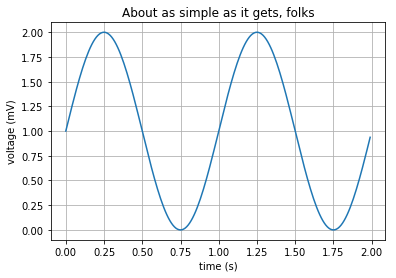

In [28]:
# There are various types of graphs that we can draw


# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

plt.show()

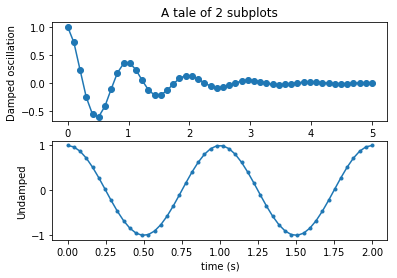

In [29]:
# You can also graph two things in the same space
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

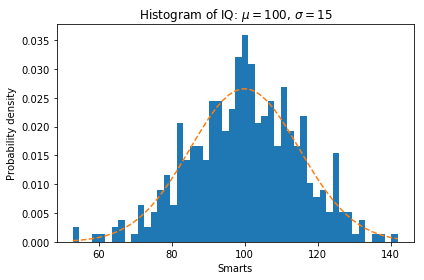

In [30]:
# Or histograms
np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

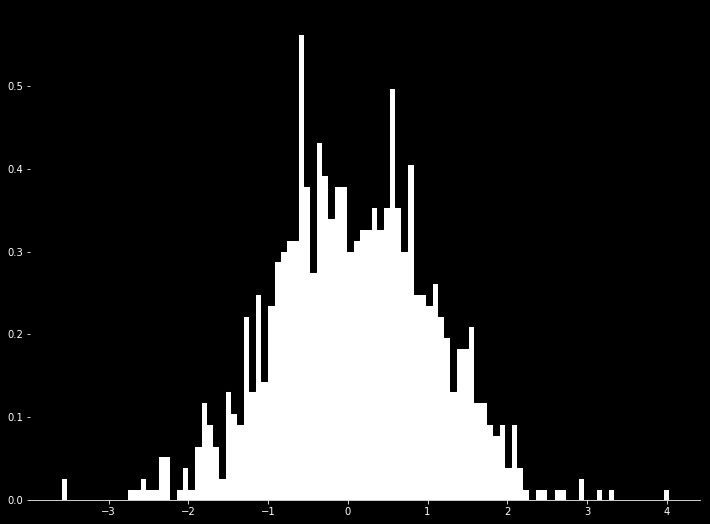

In [31]:
# But there are some things you might want to change to make your plots look nice
plt.style.use('dark_background')

plt.figure(figsize=(12,9))
# try a ratio of 1.33x
ax = plt.subplot(1,1,1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

data = np.random.randn(1000)

plt.hist(data, bins = 100, density = True, alpha = 1,
         histtype='stepfilled', color = 'white', edgecolor='black');


### *args and **kwargs in python explained

*args is used to send a non-keyworded variable length argument list to the function.

In [32]:
def test_var_args(f_arg, *argv):
    print ("first normal arg:", f_arg)
    for arg in argv:
        print ("another arg through *argv :", arg)

test_var_args('1st one as usual','1st Arg','2nd Arg','3rd Arg')

first normal arg: 1st one as usual
another arg through *argv : 1st Arg
another arg through *argv : 2nd Arg
another arg through *argv : 3rd Arg


In [33]:
def args_kwargs_test(arg1, arg2, arg3):
    print ("arg1:", arg1)
    print ("arg2:", arg2)
    print ("arg3:", arg3)

In [34]:
args = ("two", 3, 5)  
args_kwargs_test(*args)

arg1: two
arg2: 3
arg3: 5


In [35]:
kwargs = {"arg3":3, "arg2":'two', "arg1":5}
args_kwargs_test(**kwargs)

arg1: 5
arg2: two
arg3: 3


### back to graphs


In [36]:
variable_A = np.random.normal(-1, 0.8, 1000) 
variable_B = np.random.normal(-5, 1, 1000)
variable_C = np.random.normal(0, 2, 1000)

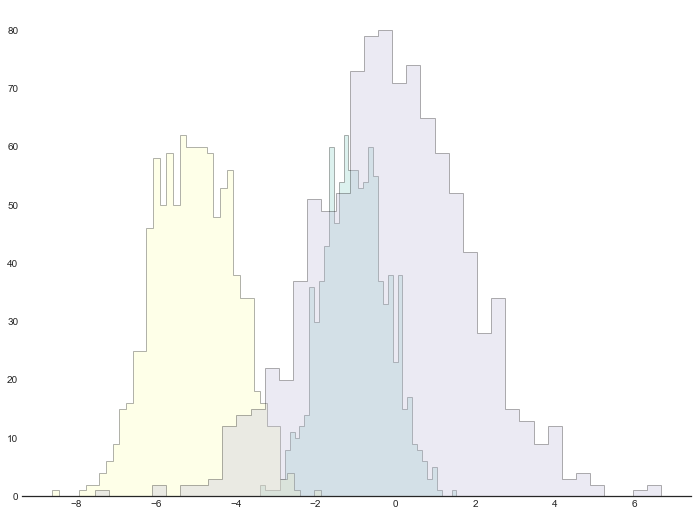

In [37]:
# style the plot
plt.style.use('seaborn-white');

# You typically want your plot to be ~1.33x wider than tall.  
# Common sizes: (10, 7.5) and (12, 9)  
plt.figure(figsize=(12, 9));
plt.style.use('seaborn-white');


#remove the top and right spines
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False) ## remove the spines here too if you want



# use kwargs to assign the same argument; you can adjust the bins

kwargs = dict(histtype='stepfilled', alpha=0.3, density=False, bins=40, edgecolor = 'black')

plt.hist(variable_A, **kwargs)
plt.hist(variable_B, **kwargs)
plt.hist(variable_C, **kwargs)
plt.savefig("fig_name.png", bbox_inches="tight", transparent=True);  

In [38]:
kwargs

{'histtype': 'stepfilled',
 'alpha': 0.3,
 'density': False,
 'bins': 40,
 'edgecolor': 'black'}

In [39]:
df.head()

,station_id,Time,PM25,PM10,NO2,CO,O3,SO2
0,dongsi,2018-03-31 07:00:00,105.0,172.0,53.0,0.8,127.0,14.0
1,tiantan,2018-03-31 07:00:00,95.0,123.0,54.0,0.9,121.0,15.0
2,guanyuan,2018-03-31 07:00:00,95.0,139.0,66.0,0.8,123.0,13.0
3,wanshouxigong,2018-03-31 07:00:00,99.0,172.0,58.0,1.0,119.0,14.0
4,aotizhongxin,2018-03-31 07:00:00,117.0,166.0,67.0,0.8,111.0,14.0


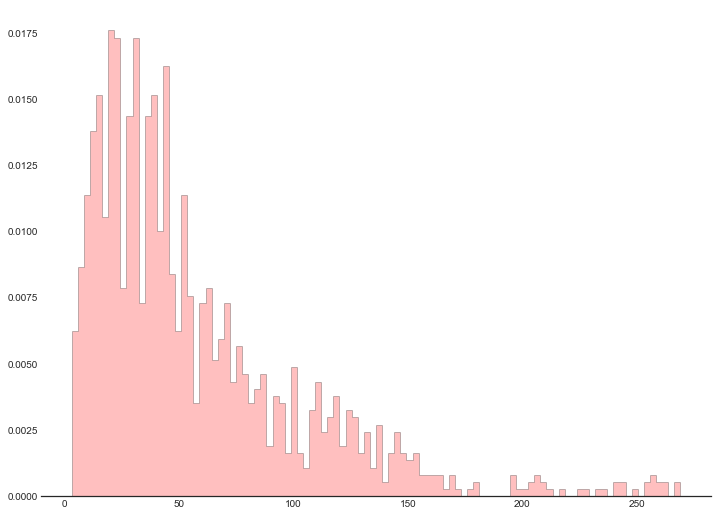

In [40]:
data = df[df['station_id'] == 'tiantan']['PM25']
# But there are some things you might want to change to make your plots look nice
plt.style.use('seaborn-white')

plt.figure(figsize=(12,9))
# try a ratio of 1.33x
ax = plt.subplot(1,1,1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.hist(data, bins = 100, density = True, alpha = 0.25,
         histtype='stepfilled', color = 'red', edgecolor='black');


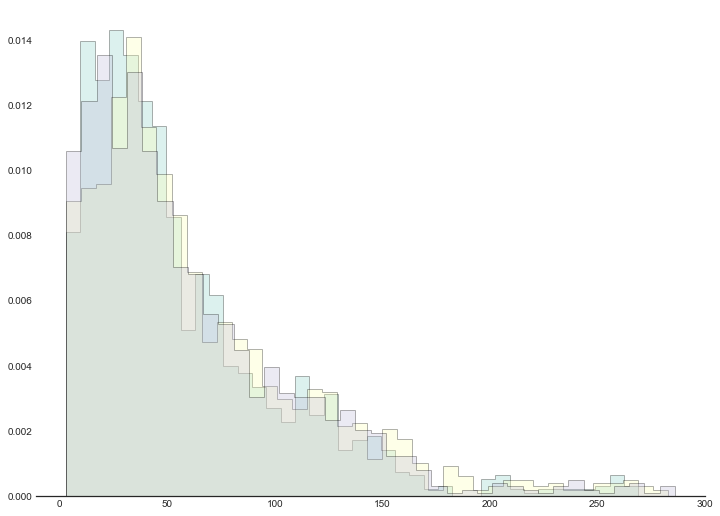

In [41]:
data_0 = df[df['station_id'] == 'tiantan']['PM25']
data_1 = df[df['station_id'] == 'dongsi']['PM25']
data_2 = df[df['station_id'] == 'wanshouxigong']['PM25']

# style the plot
plt.style.use('seaborn-white');

# You typically want your plot to be ~1.33x wider than tall.  
# Common sizes: (10, 7.5) and (12, 9)  
plt.figure(figsize=(12, 9));

plt.style.use('seaborn-white')

#remove the top and right spines
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False) ## remove the spines here too if you want



# use kwargs to assign the same argument; you can adjust the bins

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins = 40, edgecolor = 'black')

plt.hist(data_0, **kwargs)
plt.hist(data_1, **kwargs)
plt.hist(data_2, **kwargs)
plt.savefig("fig_name.png", bbox_inches="tight", transparent=True); 

In [42]:
df.station_id.nunique()

34

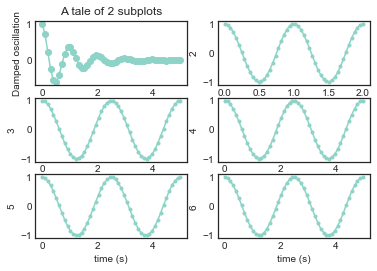

In [43]:
# You can also graph two things in the same space
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(3, 2, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(3, 2, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('2')

plt.subplot(3, 2, 3)
plt.plot(x1, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('3')

plt.subplot(3, 2, 4)
plt.plot(x1, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('4')

plt.subplot(3, 2, 5)
plt.plot(x1, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('5')

plt.subplot(3, 2, 6)
plt.plot(x1, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('6')

plt.show()

# Visualization Homework

1. Please draw the graph of Tiantan's PM25 concentration only
2. Please draw the graph of Tiantan's PM25 concntration against time
3. Is there a difference between 1 & 2? And if so, what explains the difference?
4. In an earlier example, we looked at the distribution of PM25 for Tiantan, Dongsi & Wanshouxigong stations. We noticed that we can't plot them all on the same plot. Please use 3 sublots to show this work.
5. In addition to 4, now add 3 other subplots (for a total of 6) to show the distribution of Ozone (O3)
6. How does the distribution of PM10 look like?
7. How does the distrubtion of PM25 look like for only Miyunshuiku, Donggaocun, Yongledian', Yufa and Liulihe stations
8. Divide the day into 4 parts - morning, afternoon, evening and night - could you please show the variation in distribution of NO2 for these 4 parts of the day
9. Could you do the same thing in (8) but for PM25?
10. a) Pick a station that you like and show the distribution of the elements. b) Could you show the trend of elements over time



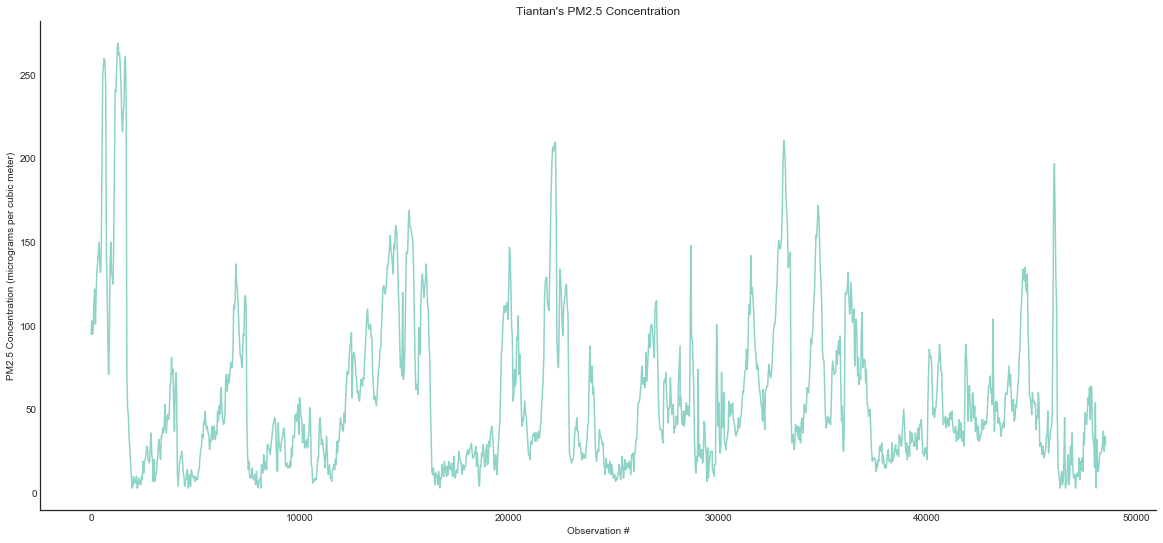

In [44]:
#1 Please draw the graph of Tiantan's PM25 concentration only

plt.figure(figsize=(20, 9));
plt.style.use('seaborn-white');

#remove the top and right spines
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

df_tian1 = df[df['station_id']=='tiantan']['PM25']
plt.xlabel('Observation #')
plt.ylabel('PM2.5 Concentration (micrograms per cubic meter)')
plt.title("Tiantan's PM2.5 Concentration")

plt.plot(df_tian1)

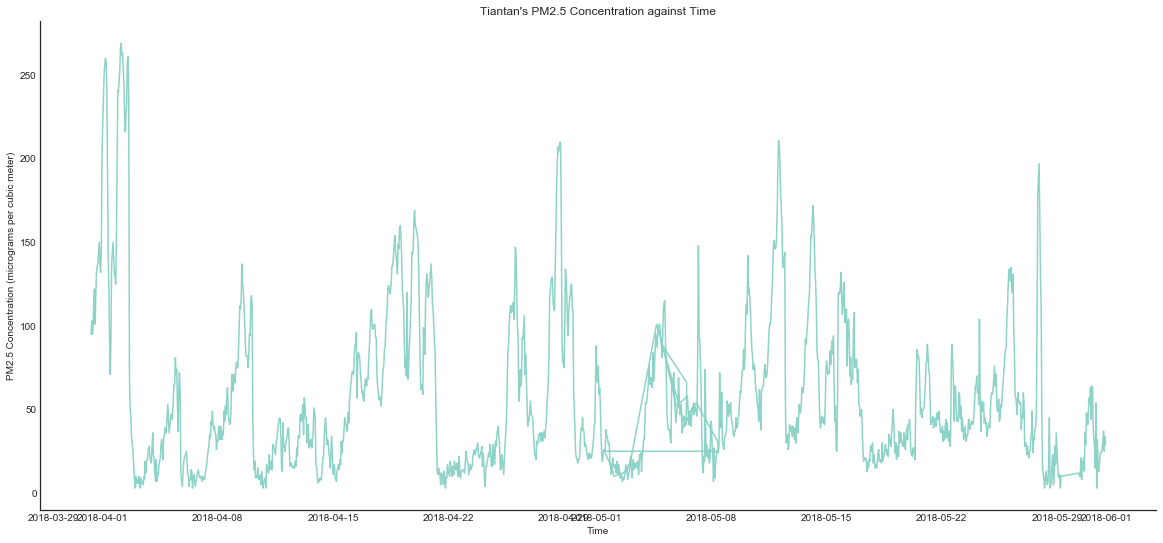

In [45]:
#2 Please draw the graph of Tiantan's PM25 concntration against time

df_tian2 = df[df['station_id']=='tiantan'][['Time', 'PM25']]

plt.figure(figsize=(20, 9));
plt.style.use('seaborn-white');

#remove the top and right spines
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

plt.xlabel('Time')
plt.ylabel('PM2.5 Concentration (micrograms per cubic meter)')
plt.title("Tiantan's PM2.5 Concentration against Time")

df_tian2 = df_tian2.set_index(['Time'])
plt.plot(df_tian2)

In [46]:
#3 Is there a difference between 1 & 2? And if so, what explains the difference?

print('There is a difference between graphs 1 and 2. This is because there are hours missing from the data set. \nFor example, on 05/01/2018, there is no measurement recorded for 12:00. \nThis creates a discrepancy between graph 1 which does not depend on timestamps, and graph 2, which does.')

There is a difference between graphs 1 and 2. This is because there are hours missing from the data set. 
For example, on 05/01/2018, there is no measurement recorded for 12:00. 
This creates a discrepancy between graph 1 which does not depend on timestamps, and graph 2, which does.


Text(0.5, 1.0, 'Distribution of PM2.5 Concentration - Wanshouxigong')

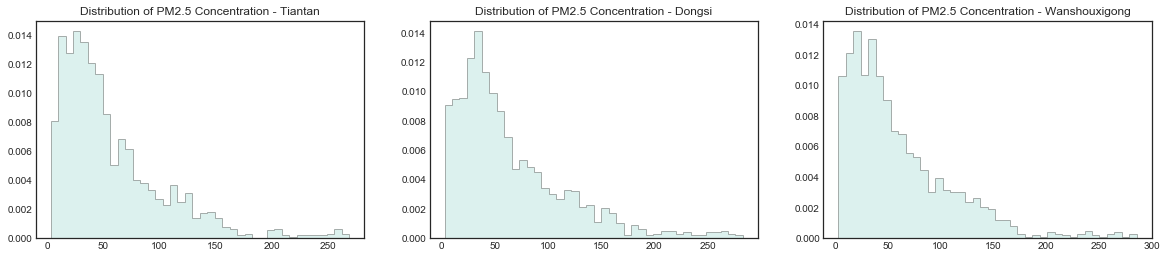

In [47]:
#4 Please use 3 sublots to show this work.

plt.figure(figsize=(20, 4));

plt.style.use('seaborn-white')

#remove the top and right spines
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

plt.subplot(1,3,1)
plt.hist(data_0, **kwargs)
plt.title('Distribution of PM2.5 Concentration - Tiantan')

plt.subplot(1,3,2)
plt.hist(data_1, **kwargs)
plt.title('Distribution of PM2.5 Concentration - Dongsi')

plt.subplot(1,3,3)
plt.hist(data_2, **kwargs)
plt.title('Distribution of PM2.5 Concentration - Wanshouxigong')

Text(0.5, 1.0, 'Distribution of O3 Concentration - Wanshouxigong')

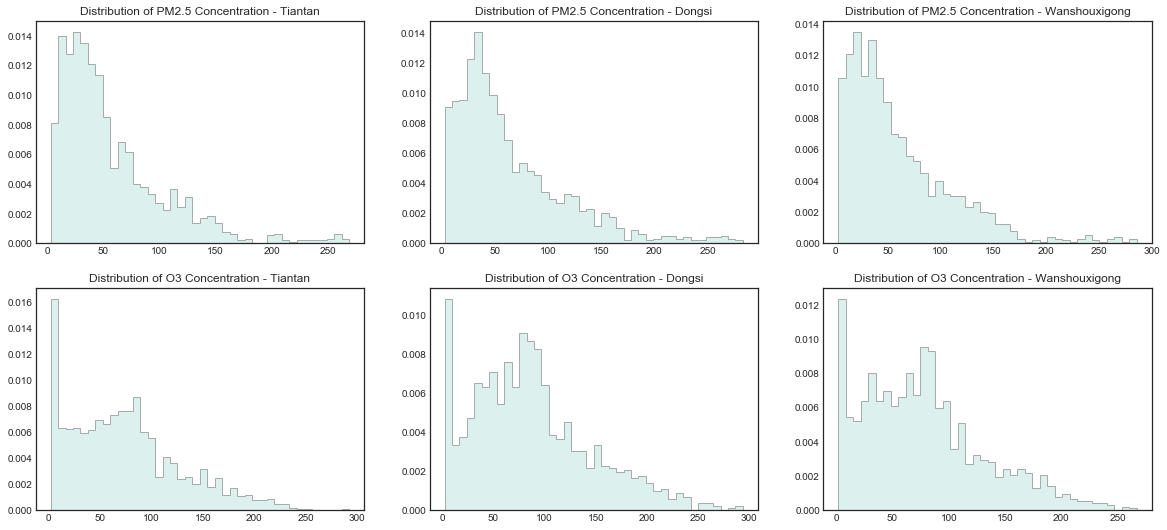

In [48]:
#5 In addition to 4, now add 3 other subplots (for a total of 6) to show the distribution of Ozone (O3)

data_3 = df[df['station_id'] == 'tiantan']['O3']
data_4 = df[df['station_id'] == 'dongsi']['O3']
data_5 = df[df['station_id'] == 'wanshouxigong']['O3']

plt.figure(figsize=(20, 9));

plt.style.use('seaborn-white')

#remove the top and right spines
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

plt.subplot(2,3,1)
plt.hist(data_0, **kwargs)
plt.title('Distribution of PM2.5 Concentration - Tiantan')

plt.subplot(2,3,2)
plt.hist(data_1, **kwargs)
plt.title('Distribution of PM2.5 Concentration - Dongsi')

plt.subplot(2,3,3)
plt.hist(data_2, **kwargs)
plt.title('Distribution of PM2.5 Concentration - Wanshouxigong')

plt.subplot(2,3,4)
plt.hist(data_3, **kwargs)
plt.title('Distribution of O3 Concentration - Tiantan')

plt.subplot(2,3,5)
plt.hist(data_4, **kwargs)
plt.title('Distribution of O3 Concentration - Dongsi')

plt.subplot(2,3,6)
plt.hist(data_5, **kwargs)
plt.title('Distribution of O3 Concentration - Wanshouxigong')

Text(0.5, 1.0, 'Distribution of PM10 Concentration - All Stations')

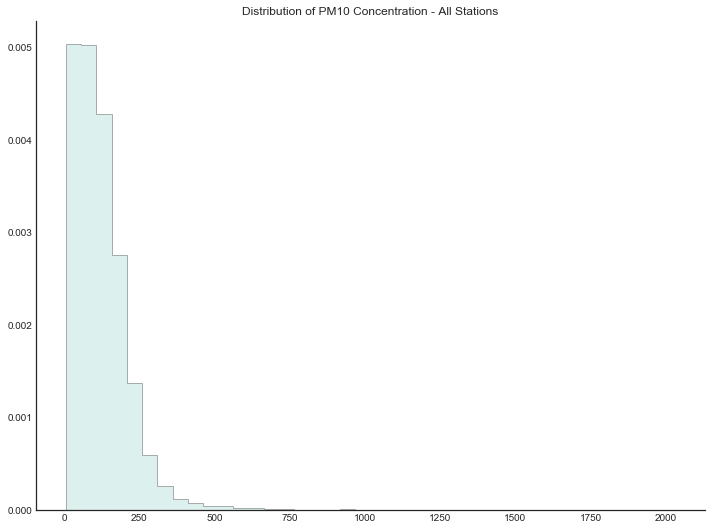

In [49]:
#6 How does the distribution of PM10 look like?

df_PM10 = df['PM10']

plt.figure(figsize=(12, 9));

plt.style.use('seaborn-white')

#remove the top and right spines
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

plt.hist(df_PM10, **kwargs)
plt.title('Distribution of PM10 Concentration - All Stations')

Text(0.5, 1.0, 'Distribution of O3 Concentration - Liulihe')

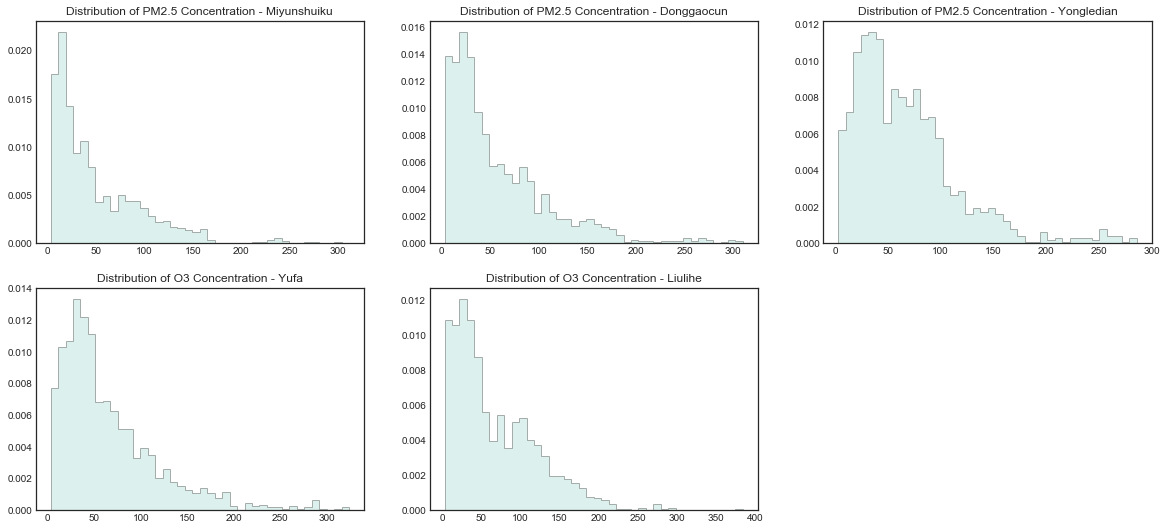

In [50]:
#7 How does the distrubtion of PM25 look like for only Miyunshuiku, Donggaocun, Yongledian', Yufa and Liulihe stations

df_miyupm = df[df['station_id'] == 'miyunshuiku']['PM25']
df_dongpm = df[df['station_id'] == 'donggaocun']['PM25']
df_yongpm = df[df['station_id'] == 'yongledian']['PM25']
df_yufapm = df[df['station_id'] == 'yufa']['PM25']
df_liulpm = df[df['station_id'] == 'liulihe']['PM25']

plt.figure(figsize=(20, 9));

plt.style.use('seaborn-white')

#remove the top and right spines
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

plt.subplot(2,3,1)
plt.hist(df_miyupm, **kwargs)
plt.title('Distribution of PM2.5 Concentration - Miyunshuiku')

plt.subplot(2,3,2)
plt.hist(df_dongpm, **kwargs)
plt.title('Distribution of PM2.5 Concentration - Donggaocun')

plt.subplot(2,3,3)
plt.hist(df_yongpm, **kwargs)
plt.title('Distribution of PM2.5 Concentration - Yongledian')

plt.subplot(2,3,4)
plt.hist(df_yufapm, **kwargs)
plt.title('Distribution of O3 Concentration - Yufa')

plt.subplot(2,3,5)
plt.hist(df_liulpm, **kwargs)
plt.title('Distribution of O3 Concentration - Liulihe')


C:\Users\Mifta\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0.5, 1.0, 'Distribution of NO2 Concentration - Night')

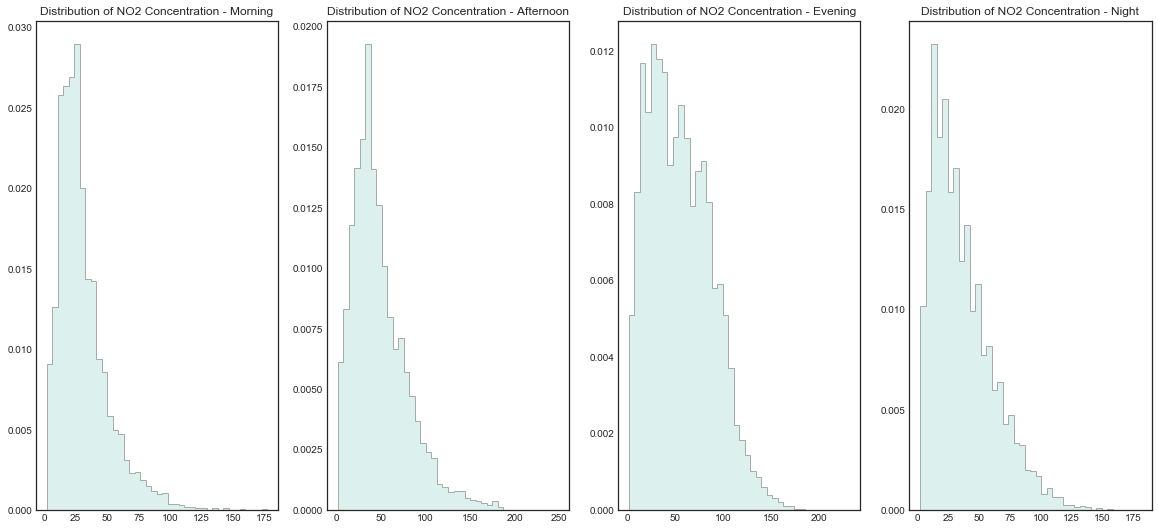

In [61]:
#8 Divide the day into 4 parts - morning, afternoon, evening and night - could you please show the variation in distribution of NO2 for these 4 parts of the day

df_NO2 = df[['Time', 'NO2']]
  
def toTofD (Time):
    hour = Time.time()
    timehour = hour.hour
    if 0 < timehour <= 6:
        tofd = 'Night'
    elif 6 < timehour <= 12:
        tofd = 'Morning'
    elif 12 < timehour <= 18:
        tofd = 'Afternoon'
    else: tofd = 'Evening'
    return tofd

df_NO2['tofd'] = df_NO2['Time'].apply(toTofD)
df_NO2 = df_NO2[['tofd', 'NO2']]

df_morn = df_NO2[df_NO2['tofd'] == 'Morning']['NO2']
df_after= df_NO2[df_NO2['tofd'] == 'Afternoon']['NO2']
df_eve  = df_NO2[df_NO2['tofd'] == 'Evening']['NO2']
df_night =df_NO2[df_NO2['tofd'] == 'Night']['NO2']

plt.figure(figsize=(20, 9));
plt.style.use('seaborn-white')

#remove the top and right spines
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

plt.subplot(1,4,1)
plt.hist(df_morn, **kwargs)
plt.title('Distribution of NO2 Concentration - Morning')

plt.subplot(1,4,2)
plt.hist(df_after, **kwargs)
plt.title('Distribution of NO2 Concentration - Afternoon')

plt.subplot(1,4,3)
plt.hist(df_eve, **kwargs)
plt.title('Distribution of NO2 Concentration - Evening')

plt.subplot(1,4,4)
plt.hist(df_night, **kwargs)
plt.title('Distribution of NO2 Concentration - Night')


C:\Users\Mifta\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0.5, 1.0, 'Distribution of PM25 Concentration - Night')

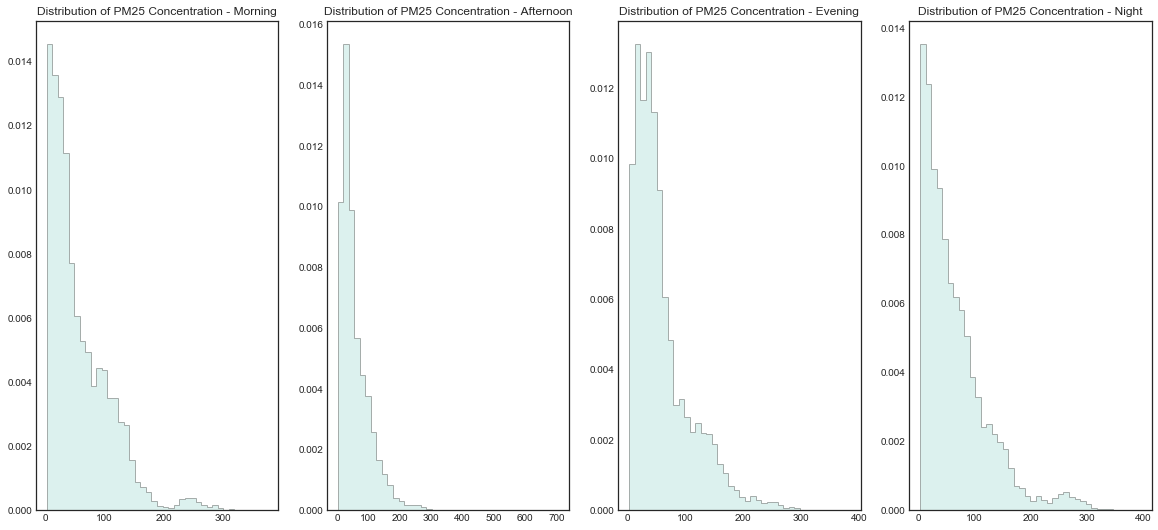

In [63]:
#9 Could you do the same thing in (8) but for PM25?

df_PM25 = df[['Time', 'PM25']]
  
df_PM25['tofd'] = df_PM25['Time'].apply(toTofD)
df_PM25 = df_PM25[['tofd', 'PM25']]

df_morn25 = df_PM25[df_PM25['tofd'] == 'Morning']['PM25']
df_after25= df_PM25[df_PM25['tofd'] == 'Afternoon']['PM25']
df_eve25  = df_PM25[df_PM25['tofd'] == 'Evening']['PM25']
df_night25 =df_PM25[df_PM25['tofd'] == 'Night']['PM25']

plt.figure(figsize=(20, 9));
plt.style.use('seaborn-white')

#remove the top and right spines
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

plt.subplot(1,4,1)
plt.hist(df_morn25, **kwargs)
plt.title('Distribution of PM25 Concentration - Morning')

plt.subplot(1,4,2)
plt.hist(df_after25, **kwargs)
plt.title('Distribution of PM25 Concentration - Afternoon')

plt.subplot(1,4,3)
plt.hist(df_eve25, **kwargs)
plt.title('Distribution of PM25 Concentration - Evening')

plt.subplot(1,4,4)
plt.hist(df_night25, **kwargs)
plt.title('Distribution of PM25 Concentration - Night')

Text(0.5, 1.0, 'Daxing Distribution of SO2 Concentration')

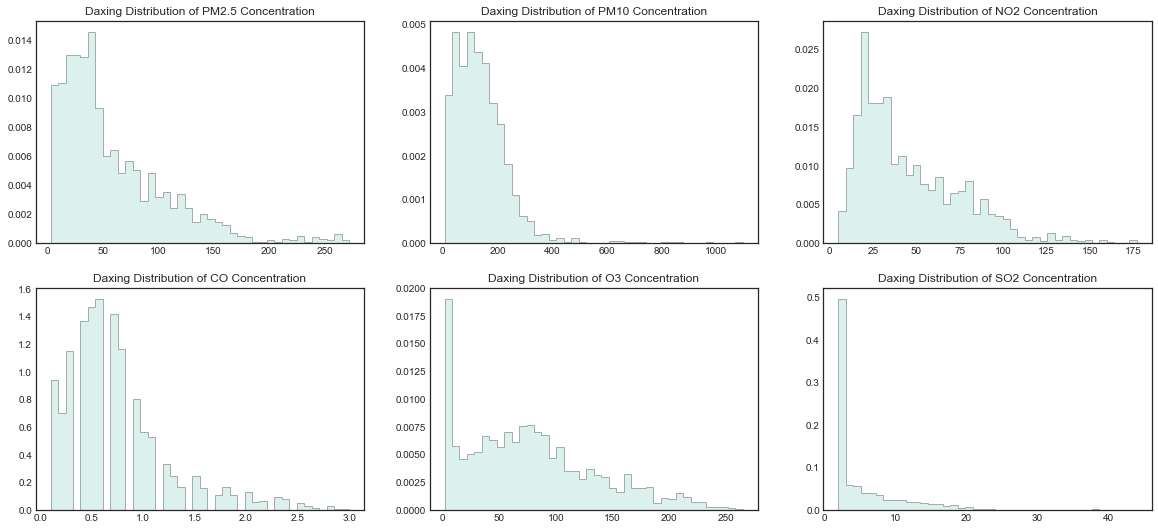

In [67]:
#10 a) Pick a station that you like and show the distribution of the elements. 

df_daxing = df[df['station_id']=='daxing']

df_daxpm25 = df_daxing['PM25']
df_daxpm10 = df_daxing['PM10']
df_daxno2  = df_daxing['NO2']
df_daxco   = df_daxing['CO']
df_daxo3   = df_daxing['O3']
df_daxso2  = df_daxing['SO2']

plt.figure(figsize=(20, 9));

plt.style.use('seaborn-white')

#remove the top and right spines
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

plt.subplot(2,3,1)
plt.hist(df_daxpm25, **kwargs)
plt.title('Daxing Distribution of PM2.5 Concentration')

plt.subplot(2,3,2)
plt.hist(df_daxpm10, **kwargs)
plt.title('Daxing Distribution of PM10 Concentration')

plt.subplot(2,3,3)
plt.hist(df_daxno2, **kwargs)
plt.title('Daxing Distribution of NO2 Concentration')

plt.subplot(2,3,4)
plt.hist(df_daxco, **kwargs)
plt.title('Daxing Distribution of CO Concentration')

plt.subplot(2,3,5)
plt.hist(df_daxo3, **kwargs)
plt.title('Daxing Distribution of O3 Concentration')

plt.subplot(2,3,6)
plt.hist(df_daxso2, **kwargs)
plt.title('Daxing Distribution of SO2 Concentration')

Text(0.5, 1.0, 'Daxing SO2 Concentration Over Time')

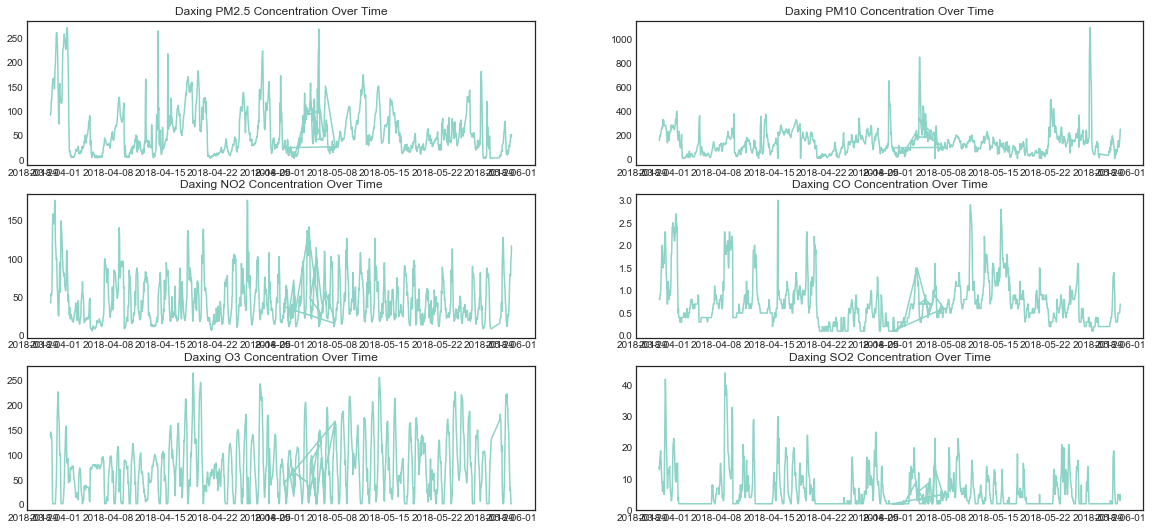

In [73]:
#10 b) Could you show the trend of elements over time

x    = df_daxing['Time']
y25  = df_daxing['PM25']
y10  = df_daxing['PM10']
yno2 = df_daxing['NO2'] 
yco  = df_daxing['CO']
yo3  = df_daxing['O3'] 
yso2 = df_daxing['SO2']

plt.figure(figsize=(20, 9));
plt.style.use('seaborn-white')

plt.subplot(3,2,1)
plt.plot(x, y25)
plt.title('Daxing PM2.5 Concentration Over Time')

plt.subplot(3,2,2)
plt.plot(x, y10)
plt.title('Daxing PM10 Concentration Over Time')

plt.subplot(3,2,3)
plt.plot(x, yno2)
plt.title('Daxing NO2 Concentration Over Time')

plt.subplot(3,2,4)
plt.plot(x, yco)
plt.title('Daxing CO Concentration Over Time')

plt.subplot(3,2,5)
plt.plot(x, yo3)
plt.title('Daxing O3 Concentration Over Time')

plt.subplot(3,2,6)
plt.plot(x, yso2)
plt.title('Daxing SO2 Concentration Over Time')